In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump

In [3]:
# Read data
dataset = pd.read_csv('C:/Users/SUMANTH REDDY/Downloads/ML-assisted-prediction-interpretation-of-electrochemical-corrosion-behavior-in-HEAs-master/Corrosion_potential.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   319 non-null    int64  
 1   Composition  319 non-null    object 
 2   Environment  319 non-null    int64  
 3   PH           319 non-null    float64
 4   [Cl-]        319 non-null    float64
 5   [SO42-]      319 non-null    float64
 6   VEC          319 non-null    float64
 7   σVEC         319 non-null    float64
 8   ΔSmix        319 non-null    float64
 9   ΔHmix        319 non-null    float64
 10  Ω            319 non-null    float64
 11  δ            319 non-null    float64
 12  rbar         319 non-null    float64
 13  Δχ           319 non-null    float64
 14  χbar         319 non-null    float64
 15  e/a          319 non-null    float64
 16  Tm           319 non-null    float64
 17  σT           319 non-null    float64
 18  Ec           319 non-null    float64
 19  Al      

In [4]:
# Remove unnecessary axes
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)


dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
[SO42-]        0
VEC            0
σVEC           0
ΔSmix          0
ΔHmix          0
Ω              0
δ              0
rbar           0
Δχ             0
χbar           0
e/a            0
Tm             0
σT             0
Ec             0
Al             0
Co             0
Cr             0
Fe             0
Ni             0
Cu             0
Ti             0
V              0
Si             0
Mn             0
Mo             0
Nb             0
Hf             0
Ta             0
Zr             0
C              0
Sn             0
P              0
B              0
W              0
Y              0
Ecorr          4
dtype: int64

In [5]:
# Remove blank lines
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 318
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   [SO42-]      315 non-null    float64
 4   VEC          315 non-null    float64
 5   σVEC         315 non-null    float64
 6   ΔSmix        315 non-null    float64
 7   ΔHmix        315 non-null    float64
 8   Ω            315 non-null    float64
 9   δ            315 non-null    float64
 10  rbar         315 non-null    float64
 11  Δχ           315 non-null    float64
 12  χbar         315 non-null    float64
 13  e/a          315 non-null    float64
 14  Tm           315 non-null    float64
 15  σT           315 non-null    float64
 16  Ec           315 non-null    float64
 17  Al           315 non-null    float64
 18  Co           315 non-null    float64
 19  Cr           

In [6]:
from sklearn.model_selection import train_test_split


# Divide the data into X and y
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

# Pearson Correlation Analysis

# Empirical parameters and environmental factors only

<Figure size 1000x800 with 0 Axes>

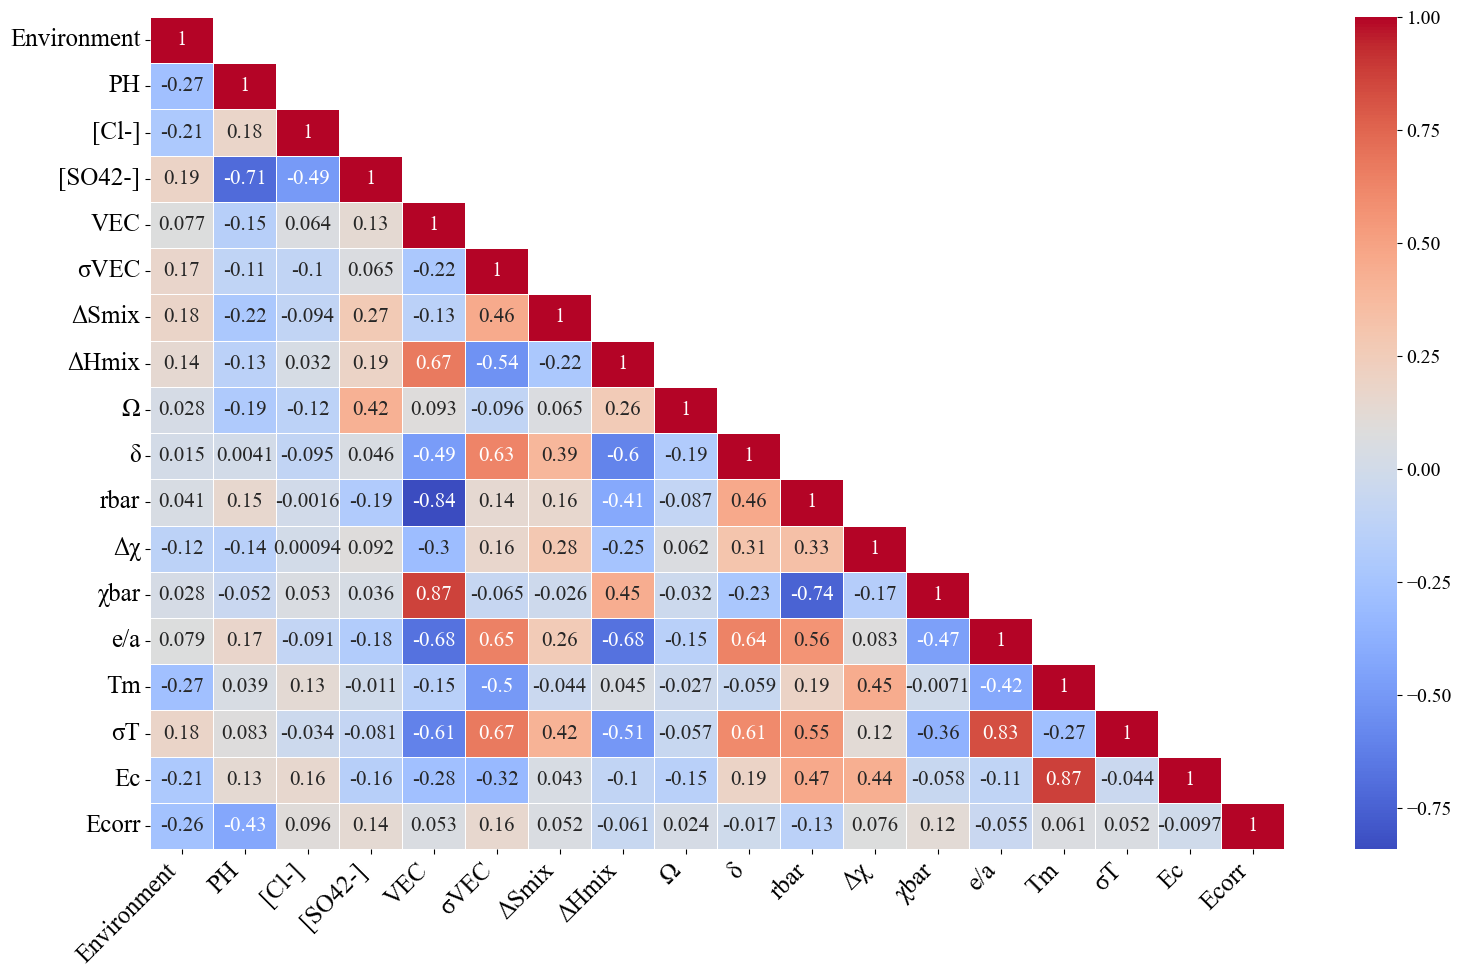

In [7]:
# Generate Pearson correlation coefficient matrix
P = dataset[['Environment', 'PH', '[Cl-]', '[SO42-]', 'VEC', 'σVEC', 'ΔSmix', 'ΔHmix', 'Ω', 'δ', 'rbar', 'Δχ', 'χbar', 'e/a', 'Tm', 'σT', 'Ec', 'Ecorr']]
corr=P.corr(method='pearson')

# Set image size, font size, font type
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Generate a matrix of the same size as the correlation coefficient matrix and set the element on its main diagonal to 1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Drawing the thermal map of the correlation coefficient matrix
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 15}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [8]:
# Select features based on correlation coefficient
threshold = 0.8  # Set the correlation coefficient threshold
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('VEC', 'rbar'), ('VEC', 'χbar'), ('e/a', 'σT'), ('Tm', 'Ec')]


In [9]:
# According to the results of Pearson correlation analysis, some feature parameters are eliminateddataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)

# Includes only ingredients

<Figure size 1000x800 with 0 Axes>

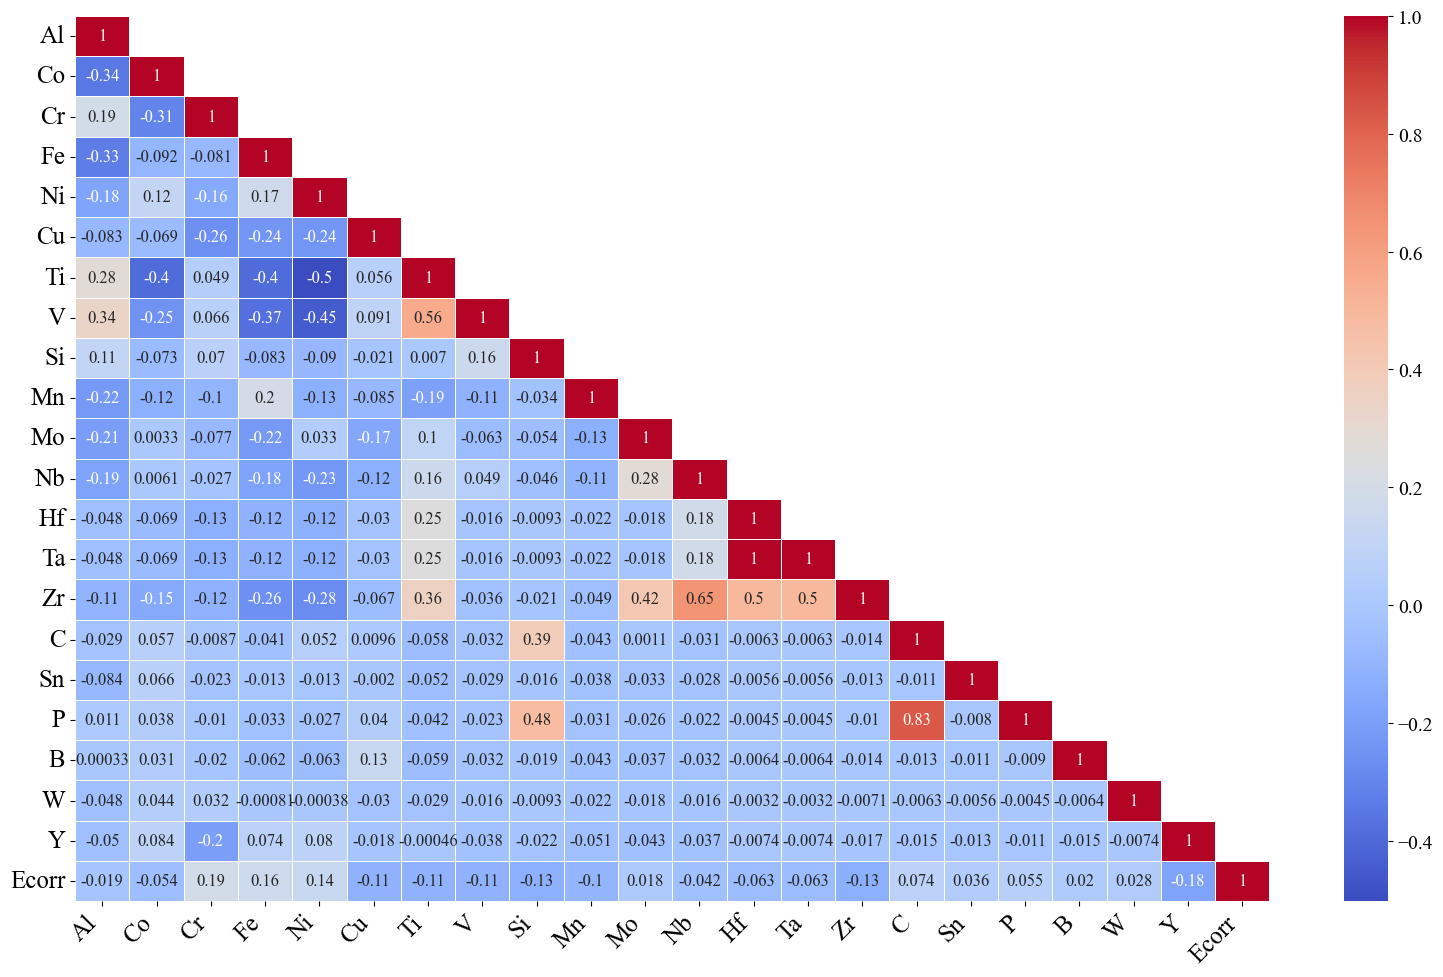

In [10]:
# Generate Pearson correlation coefficient matrix
P = dataset[['Al', 'Co', 'Cr', 'Fe', 'Ni', 'Cu', 'Ti', 'V', 'Si', 'Mn', 'Mo', 'Nb', 'Hf', 'Ta', 'Zr', 'C', 'Sn', 'P', 'B', 'W', 'Y', 'Ecorr']]
corr=P.corr(method='pearson')

# Set image size, font size, font type
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Generate a matrix of the same size as the correlation coefficient matrix and set the element on its main diagonal to 1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Drawing the thermal map of the correlation coefficient matrix
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [11]:
# Select features based on correlation coefficient
threshold = 0.8  # Set the correlation coefficient threshold
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('Hf', 'Ta'), ('C', 'P')]


In [12]:
# According to the results of Pearson correlation analysis, some feature parameters are eliminated
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)

# Analysis of the characteristics of random forest model

In [ ]:
from sklearn.model_selection import train_test_split


# Divide data into X and y axes
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Distribution of importance of each feature: [1.60566696e-02 3.24820394e-01 4.30766668e-02 5.32011747e-03
 3.17200158e-02 5.22315233e-02 2.06523175e-02 2.62643232e-02
 1.79312435e-02 2.17024810e-02 1.52111300e-02 2.92236245e-02
 4.76824376e-02 3.31126293e-02 5.63953559e-02 2.47842088e-02
 6.69697799e-02 3.71121838e-02 2.03232122e-02 1.47451914e-02
 5.82100412e-03 5.90496541e-03 1.39202115e-03 2.16207445e-03
 1.18029712e-02 7.87032564e-03 9.42835426e-03 3.08770663e-04
 1.03621248e-03 1.87929673e-04 1.92526784e-05 1.34668870e-05
 4.87171458e-02]


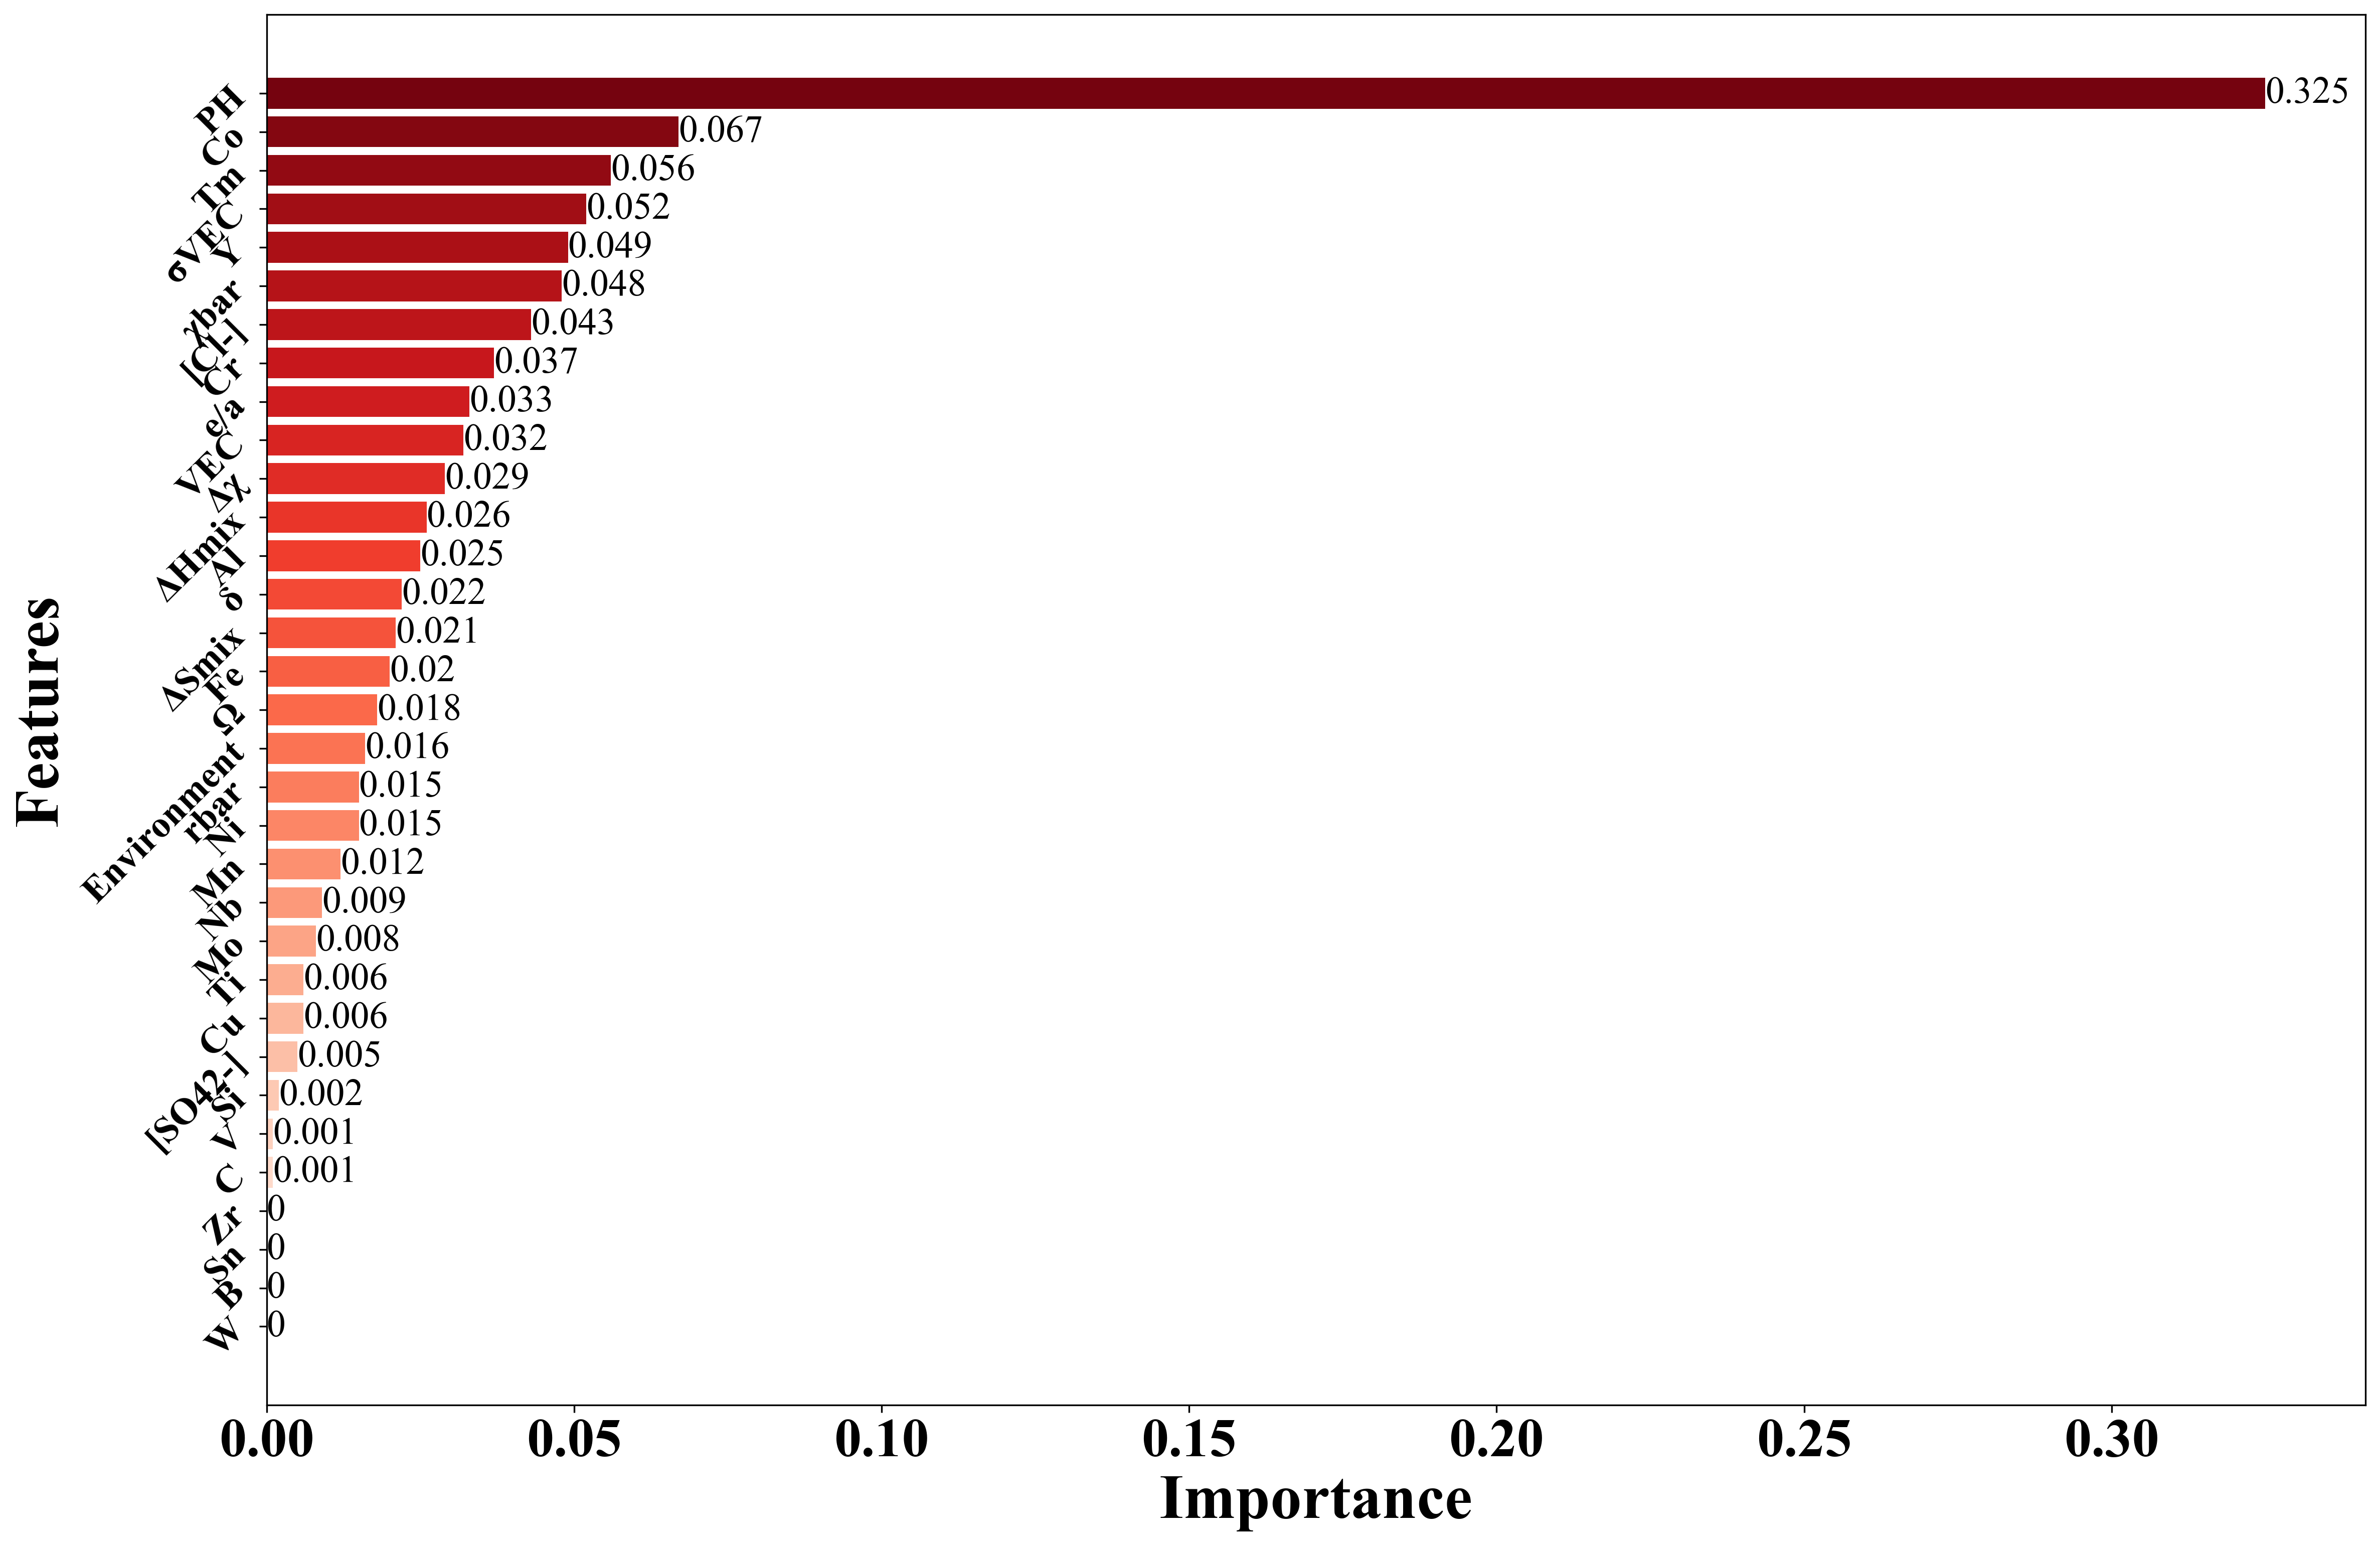

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# Get the name of the input feature
feature_names = dataset.columns[:-1]

rf = RandomForestRegressor()                               # 创建随机森林回归模型
c = rf.fit(X_train, y_train).feature_importances_    # 特征重要性
print("Distribution of importance of each feature:",c)

importances=pd.DataFrame(c,columns=['importance'])
feature_data=pd.DataFrame(feature_names,columns=['feature'])
importance=pd.concat([feature_data,importances],axis=1)
importance=importance.sort_values(['importance'],ascending=True)
values=np.around(importance['importance'].values,decimals=3)

# Create a red gradient palette
red_palette = sns.color_palette("Reds", len(importance))

plt.figure(figsize=(18,12), dpi=300)
p1=plt.barh(importance['feature'],values,color=red_palette,label='values')
plt.bar_label(p1, label_type='edge',fontproperties={'family':'Times New Roman', 'weight':'normal', 'size':18})

plt.xlabel('Importance',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':30})
plt.ylabel('Features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':30})

plt.xticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':26})
plt.yticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':18}, rotation=45)

# Remove legend
plt.legend().remove()
# plt.savefig("importance.png", dpi=300,format="png")
plt.show()

In [15]:
# According to the analysis results of feature importance, some feature parameters are eliminated
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 318
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   [SO42-]      315 non-null    float64
 4   VEC          315 non-null    float64
 5   σVEC         315 non-null    float64
 6   ΔSmix        315 non-null    float64
 7   ΔHmix        315 non-null    float64
 8   Ω            315 non-null    float64
 9   δ            315 non-null    float64
 10  rbar         315 non-null    float64
 11  Δχ           315 non-null    float64
 12  χbar         315 non-null    float64
 13  e/a          315 non-null    float64
 14  Tm           315 non-null    float64
 15  Al           315 non-null    float64
 16  Co           315 non-null    float64
 17  Cr           315 non-null    float64
 18  Fe           315 non-null    float64
 19  Ni           

# Pearson correlation analysis was performed on all the characteristics after screening

<Figure size 1000x800 with 0 Axes>

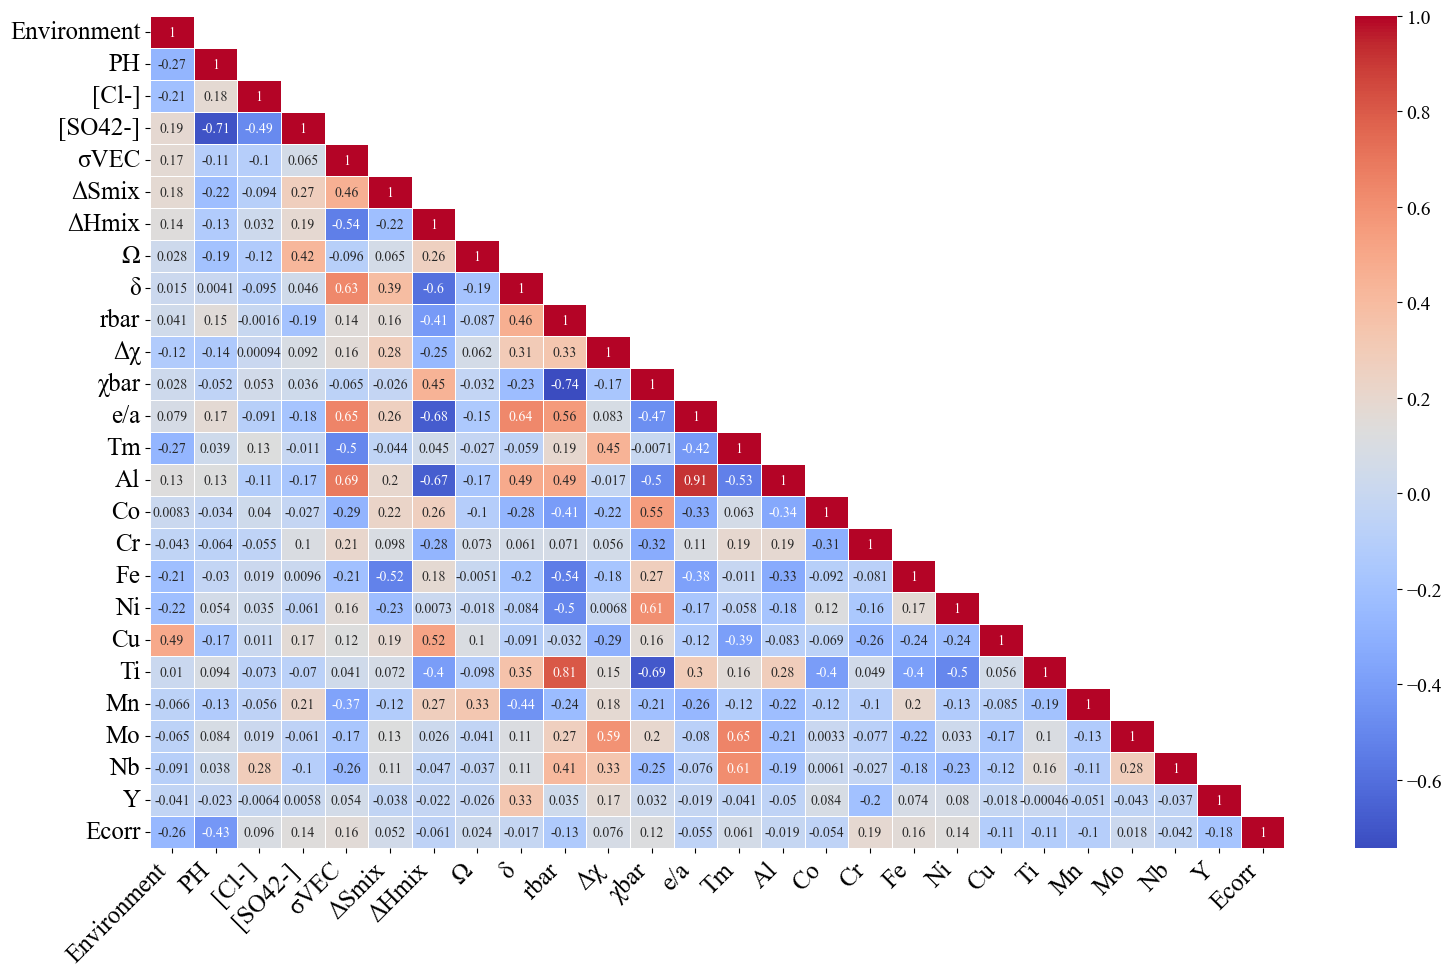

In [17]:
# Generate Pearson correlation coefficient matrix
P = dataset[['Environment', 'PH', '[Cl-]', '[SO42-]', 'σVEC', 'ΔSmix', 'ΔHmix', 'Ω', 'δ', 'rbar', 'Δχ', 'χbar', 'e/a', 'Tm', 'Al', 'Co', 
             'Cr', 'Fe', 'Ni', 'Cu', 'Ti', 'Mn', 'Mo', 'Nb', 'Y', 'Ecorr']]
corr=P.corr(method='pearson')

# Set image size, font size, font type
fig = plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Generate a matrix of the same size as the correlation coefficient matrix and set the element on its main diagonal to 1
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

# Drawing the thermal map of the correlation coefficient matrix
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10}, mask=mask)

plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

In [18]:
# Select features based on correlation coefficient
threshold = 0.8  # Set the correlation coefficient threshold
high_corr = np.where(abs(corr) > threshold)
high_corr = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
print('Highly correlated features:', high_corr)

Highly correlated features: [('rbar', 'Ti'), ('e/a', 'Al')]


In [19]:
# According to the results of Pearson correlation analysis, some feature parameters are eliminateddataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Al', axis=1)

# Recursive elimination method

In [20]:
from sklearn.model_selection import train_test_split


# Divide data into X and y axes
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150,
                                                    )

# Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 318
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   [SO42-]      315 non-null    float64
 4   VEC          315 non-null    float64
 5   σVEC         315 non-null    float64
 6   ΔSmix        315 non-null    float64
 7   ΔHmix        315 non-null    float64
 8   Ω            315 non-null    float64
 9   δ            315 non-null    float64
 10  rbar         315 non-null    float64
 11  Δχ           315 non-null    float64
 12  χbar         315 non-null    float64
 13  e/a          315 non-null    float64
 14  Tm           315 non-null    float64
 15  Co           315 non-null    float64
 16  Cr           315 non-null    float64
 17  Fe           315 non-null    float64
 18  Ni           315 non-null    float64
 19  Cu           

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


estimator = RandomForestRegressor()                               # 随机森林

print("Recursive feature elimination method to filter the optimal feature combination")
score = []                                                            # 建立列表
for i in range(1, 24, 1):
    selector = RFE(estimator, n_features_to_select=i,step=1)
    selector = selector.fit(X_train, y_train) # 最优特征
    # Which features are selected as the last feature? True means selected as
    print(selector.support_)
    # The lower the score of each feature (1 is best), the better the feature
    print(selector.ranking_)
    #  Selected several features
    print(selector.n_features_)
    once = -cross_val_score(estimator,selector.fit_transform(X_train, y_train), y_train, cv=5, scoring='neg_mean_squared_error').mean()                      # 交叉验证
    score.append(once)                                                           # 交叉验证结果保存到列表
print(min(score), (score.index(min(score))*1)+1)               # 输出最优分类结果和对应的特征数量
print(score)

Recursive feature elimination method to filter the optimal feature combination
[False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False]
[17  2  9 25 12  6 16  7 14 13 19 11  5  3  1  4  8 15 18 23 24 20 21 22
 10]
1
[False  True False False False False False False False False False False
 False False  True False False False False False False False False False
 False]
[17  1  8 24 11  2 15  6 14 12 18 10  5  3  1  4  7 13 16 23 22 20 21 19
  9]
2
[False  True False False False  True False False False False False False
 False False  True False False False False False False False False False
 False]
[17  1  7 22  6  1 10 11 15 12 16  5  4  2  1  3  9 13 14 23 21 19 20 18
  8]
3
[False  True False False False  True False False False False False False
 False  True  True False False False False False False False False False
 False]
[15  1  6 22  9  1 13  5 12 10 16  8  3  1  1  2  4 11 14 19 21 1

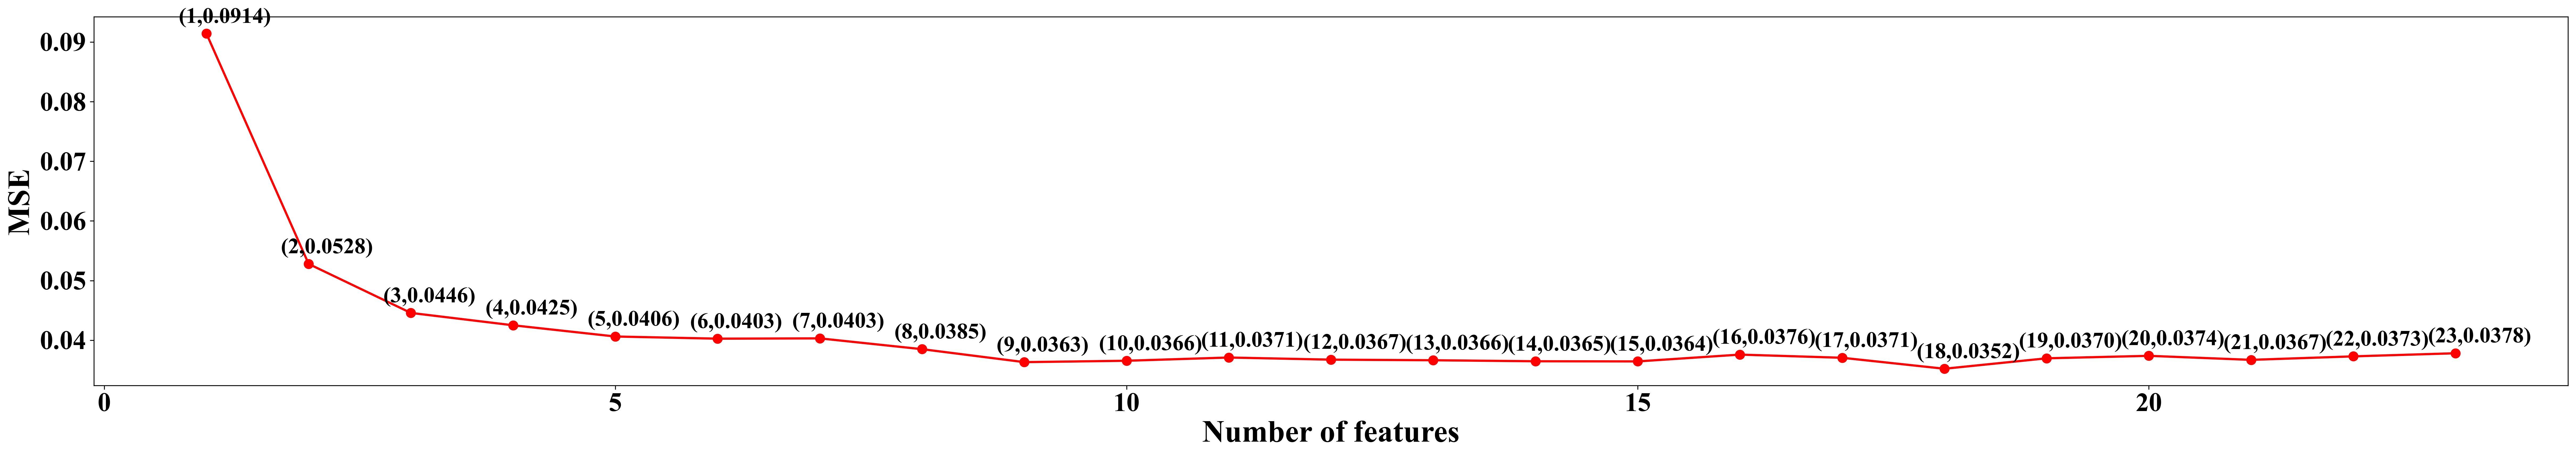

In [23]:
plt.figure(figsize=[40, 6], dpi=300)
plt.plot(range(1, 24, 1), score, marker='o', color='red', linewidth=2, markersize=8)

plt.xlabel('Number of features',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':28})
plt.ylabel('MSE',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':28})

for xy in zip(range(1, 24, 1), score):
    plt.annotate("(%s,%.4f)" % xy, xy=xy, xytext=(-25, 10),textcoords='offset points',weight='bold',fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':20})

plt.xticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})
plt.yticks(fontproperties={'family':'Times New Roman', 'weight':'bold', 'size':24})

plt.show()

In [24]:
# According to the results of the recursive elimination method, some feature parameters are eliminated
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('δ', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('Δχ', axis=1)
dataset = dataset.drop('Fe', axis=1)
dataset = dataset.drop('Ni', axis=1)
dataset = dataset.drop('Cu', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Nb', axis=1)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 318
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   VEC          315 non-null    float64
 4   σVEC         315 non-null    float64
 5   ΔHmix        315 non-null    float64
 6   χbar         315 non-null    float64
 7   e/a          315 non-null    float64
 8   Tm           315 non-null    float64
 9   Co           315 non-null    float64
 10  Cr           315 non-null    float64
 11  Ti           315 non-null    float64
 12  Y            315 non-null    float64
 13  Ecorr        315 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 36.9 KB
